
<h1 style="text-align:center">Travelers saleman Problem using Ant Colony Optimization</h1>
<h2 style="text-align:center"> Machine learning Assignment-4 </h2>

<p>
    
|Name | NetId|
|:------|:------|
|Manish Kakarla | mt8383|
|Seshu Varma Dantuluri | mj1710|
|Omkar Chowdary Mandava |bd3824|
|akshith simha katragada |yd8937|
|Nikhil Chandra Reddy Gajjala |af3138|
   
</p>

In [1]:
#Importing libraries
import random
import numpy as np
import copy
import seaborn as sns
random.seed(0)
import matplotlib.pyplot as plt

In [2]:
#list of the cities given
cities="""
Bakersfield
Barstow
Carlsbad
Eureka
Fresno
lake Tahoe,So
Las Vegas
Long Beach
Los Angeles
Merced
Modesto
Monterey
Oakland
Palm Springs
Redding
Sacremento
San Bernardino
San Diego
San Francisco
San Jose
San Luis Obispo
Santa Barbara
San Cruz
Santa Rosa
Sequoia Park
Stockton
Yosemite
"""
# converting the cities into list 
cities = [c for c in cities.split('\n') if c != '']

In [3]:
## encoding the number with names
name_encode={}
count=0
for i in cities:
    if i not in name_encode:
        name_encode[count]=i
        count+=1
print(name_encode)
    

{0: 'Bakersfield', 1: 'Barstow', 2: 'Carlsbad', 3: 'Eureka', 4: 'Fresno', 5: 'lake Tahoe,So', 6: 'Las Vegas', 7: 'Long Beach', 8: 'Los Angeles', 9: 'Merced', 10: 'Modesto', 11: 'Monterey', 12: 'Oakland', 13: 'Palm Springs', 14: 'Redding', 15: 'Sacremento', 16: 'San Bernardino', 17: 'San Diego', 18: 'San Francisco', 19: 'San Jose', 20: 'San Luis Obispo', 21: 'Santa Barbara', 22: 'San Cruz', 23: 'Santa Rosa', 24: 'Sequoia Park', 25: 'Stockton', 26: 'Yosemite'}


In [4]:
#encoding names with numbers
number_encode={}
count=0
for i in cities:
    if i not in number_encode:
        number_encode[i]=count
        count+=1
print(number_encode)

{'Bakersfield': 0, 'Barstow': 1, 'Carlsbad': 2, 'Eureka': 3, 'Fresno': 4, 'lake Tahoe,So': 5, 'Las Vegas': 6, 'Long Beach': 7, 'Los Angeles': 8, 'Merced': 9, 'Modesto': 10, 'Monterey': 11, 'Oakland': 12, 'Palm Springs': 13, 'Redding': 14, 'Sacremento': 15, 'San Bernardino': 16, 'San Diego': 17, 'San Francisco': 18, 'San Jose': 19, 'San Luis Obispo': 20, 'Santa Barbara': 21, 'San Cruz': 22, 'Santa Rosa': 23, 'Sequoia Park': 24, 'Stockton': 25, 'Yosemite': 26}


In [5]:
#given distance matrix
distance=np.array([
     [0,129,206,569,107,360,284,144,115,162,200,231,288,226,436,272,174,231,297,252,118,146,258,347,121,227,200],
     [129,0,153,696,236,395,155,139,130,291,329,360,417,123,565,401,71,176,426,381,247,225,387,476,250,356,329],
     [206,153,0,777,315,780,312,82,93,370,406,428,496,116,644,480,827,23,505,460,293,188,466,565,329,435,408],
     [569,696,777,0,462,398,797,713,694,407,369,388,291,795,150,314,43,800,272,317,504,609,349,222,544,356,488],
     [107,236,315,462,0,388,408,251,222,55,93,152,181,333,329,185,281,338,190,145,137,242,151,240,82,120,93],
     [360,395,780,398,388,0,466,479,456,194,156,266,195,435,249,107,436,542,192,197,197,492,229,199,335,131,133],
     [284,155,312,797,408,466,0,314,302,446,484,504,567,276,640,587,228,332,568,524,414,354,524,610,408,510,435],
     [144,139,82,713,251,479,314,0,29,306,344,364,432,112,580,416,68,105,441,396,229,124,402,491,265,371,344],
     [115,130,93,694,222,456,302,29,0,277,315,335,403,111,551,387,59,116,412,367,200,95,373,462,236,342,315],
     [162,291,370,407,55,194,446,306,277,0,37,118,126,388,274,110,336,393,135,115,192,297,118,185,137,65,81],
     [200,329,406,369,93,156,484,344,315,37,0,153,88,426,236,72,374,431,97,82,230,335,114,147,175,27,119],
     [231,360,428,388,152,266,504,364,335,118,153,0,111,446,325,185,394,451,116,71,135,240,45,166,234,140,199],
     [288,417,496,291,181,195,567,432,403,126,88,111,0,514,214,87,462,519,9,40,227,332,72,59,263,75,207],
     [226,123,116,798,333,435,276,112,111,388,426,446,514,0,682,498,52,139,523,478,311,206,484,573,347,453,426],
     [436,565,644,150,329,249,640,580,551,274,236,325,214,682,0,164,610,667,223,254,411,546,286,251,411,209,355],
     [272,401,450,314,155,107,587,416,387,110,72,185,87,498,164,0,446,503,87,114,301,406,146,103,247,45,191],
     [174,71,827,43,281,436,228,68,59,336,374,394,462,52,610,446,0,105,471,426,259,254,432,521,295,401,374],
     [231,176,23,800,338,542,332,105,116,393,431,451,519,139,667,503,105,0,528,483,316,211,489,578,352,458,431],
     [297,426,505,272,190,192,568,441,412,135,97,116,9,523,223,87,471,528,0,45,232,337,77,50,272,84,216],
     [252,381,460,317,145,197,524,396,367,114,82,71,40,478,254,114,426,483,45,0,187,292,32,95,227,69,195],
     [118,247,293,504,137,197,414,229,200,192,230,135,227,311,411,301,259,316,232,187,0,105,180,282,174,256,230],
     [146,225,155,604,242,492,354,124,95,297,335,240,332,206,546,406,254,211,337,292,105,0,285,387,287,361,335],
     [258,387,466,349,349,151,229,524,402,373,118,114,45,72,484,286,146,432,489,77,32,180,285,0,127,233,101,199],
     [347,476,565,222,240,199,610,491,462,185,147,166,59,573,251,103,521,578,50,95,282,357,127,0,322,134,266],
     [121,250,329,544,82,335,408,265,236,137,175,234,263,347,411,247,295,352,272,227,174,287,233,322,0,202,175],
     [227,356,435,356,120,131,520,371,342,65,27,140,75,453,209,45,401,458,84,69,256,361,101,134,202,0,146],
     [200,329,408,488,93,133,435,344,315,81,119,199,207,426,355,91,374,431,216,195,230,335,199,266,175,146,0]])
     

In [6]:
random.sample(range(27),10)

[12, 24, 13, 1, 8, 16, 15, 26, 9, 20]

In [7]:
random.seed(0)
#initializing the tabu list with m ants 
def start(m,cities):
    """ returns the starting tabu 
        list of m ants with 
        different cities"""
    
    ant=[]
    for i in random.sample(range(27),m):
        ant.append([cities[i]])
    return ant

In [8]:
m=20
start(m,cities)

[['Oakland'],
 ['Sequoia Park'],
 ['Palm Springs'],
 ['Barstow'],
 ['Los Angeles'],
 ['San Bernardino'],
 ['Sacremento'],
 ['Yosemite'],
 ['Merced'],
 ['San Luis Obispo'],
 ['Monterey'],
 ['Las Vegas'],
 ['San Cruz'],
 ['Carlsbad'],
 ['Fresno'],
 ['Stockton'],
 ['Santa Rosa'],
 ['San Francisco'],
 ['San Jose'],
 ['Santa Barbara']]

In [9]:
def initialize_probability(cities,beta):
    """Initialize the probability matrix
        pheromone matrix,visibility matrix"""
    
    pheromone_matrix = np.ones((len(cities), len(cities)))
    # Remove the diagonal since there is no pheromone from node i to itself
    pheromone_matrix[np.eye(len(cities)) == 1] = 0
    ones=np.ones((len(cities),len(cities)))
    visibility_matrix=np.ones((len(cities),len(cities)))
    
    
    for i in range(len(cities)):
        for j in range(len(cities)):
            if distance[i][j]!=0:
                visibility_matrix[i][j]=1/distance[i][j]
            else:
                visibility_matrix[i][j]=0
                
    probability_matrix=np.dot(pheromone_matrix,visibility_matrix**beta)
    return probability_matrix,pheromone_matrix,visibility_matrix

    

In [10]:
def new_probability(probability_matrix,pheromone_matrix,visibility_matrix):
    for i in range(27):
        den=0
        for j in range(27):
            g=[i for i in range(27) if i!=j]
            num=np.dot(pheromone_matrix[i,j],visibility_matrix[i,j]**beta)
            den=np.sum(np.dot(pheromone_matrix[i,g],visibility_matrix[i,g]**beta))
            probability_matrix[i][j]=num/den
    return probability_matrix

In [11]:
def update_probability(pheromone_matrix,visibility_matrix,beta):
    """
    update the probability matrix
    with the new pheromone matrix,
    visibility_matrix
    """
    return np.dot(pheromone_matrix,visibility_matrix**beta)

In [12]:
def choose_next(from_node,available_nodes,probability):
    """ 
    Selecting the next city 
    using the probability matrix
    from a given city
    
    """
    if np.random.random() < 0.1:
        next_node=np.argmax(probability[from_node])
        i=0
        while next_node not in available_nodes and i<=len(available_nodes)-1:       
            next_node=np.argsort(probability[from_node])[-1-i]
            i=i+1
        if next_node not in available_nodes:
            next_node=np.random.choice(available_nodes)
    
    next_node=np.argmax(probability[from_node])  
    return next_node
    

In [13]:
def choose_next(from_node,available_nodes,probability_matrix):
    numerator=probability_matrix[from_node,available_nodes]
    if np.random.random() < 0.1:
        next_node=np.argmax(numerator)
        i=0
        while next_node not in available_nodes and i<=len(available_nodes)-1:       
            next_node=np.argsort(numerator)[-1-i]
            i=i+1
        if next_node not in available_nodes:
            next_node=np.random.choice(available_nodes)
    else:
        denominator=np.sum(numerator)
        probabilities=numerator/denominator
        next_node=np.random.choice(available_nodes,p=probabilities)  
    return next_node
    

In [14]:
def remove(cities,city):
    """
    using this function to 
    remove cities so that 
    the ant cannot visit 
    the visted cities
    """
    return cities.remove(city)

In [15]:
def path_generation(tabu_list,cities,probability_matrix):
    """ 
    updating the initial tabu-list
    with the valid paths of cities
    using on the choose_next function
   
    """
    for i in tabu_list:
        cities_index=[k for k in range(len(cities))]
        start_node=i[0]
        new_cities=[i for i in range(len(cities))]
        for j in i:
            if len(new_cities)>1:
                #print(cities.index(j))
                new_cities.remove(cities.index(j))
                new=choose_next(cities.index(j),new_cities,probability_matrix)
                i.append(cities[new])
            else:
                continue
        i.append(start_node)
        city_copy=cities
    return tabu_list




The amount of pheromone laid on edge (i,j) by the m ants at each step is:




$\Delta\ T _{ij}$ = $\Sigma _{k=1} ^{m}$ $\Delta\ T$<sub>ij</sub><sup>k</sup>

$\Delta\ T _{ij} ^{k}$  = $Q \div L_{k}$
* Q is a constant
* $\ L_{k}$ is the length of the k's tour

In [16]:
def delta_pheromone(tabu_list,Q):
    """
    Calculates the amount pheromone laid by each ant
    """
    l=[]
    for i in range(len(tabu_list)):
        sum=0
        for j in range(len(tabu_list[0])-1):
            sum+=distance[number_encode[tabu_list[i][j]]][number_encode[tabu_list[i][j+1]]]
        l.append(sum)
    delta=0
    for i in l:
        delta+=Q/i
    return delta
        
    
    

$\tau [i,j] \ = \rho \cdot  \tau [i,j] + \Delta \tau_{ij}$

* where 0< $\rho $ <1

In [17]:

def phermone_evaporation(pheromone_matrix,tabu_list,rho,Q):
    """
    The pheromone is evaporated which is calculated by multiplying 
    with evaporation constant rho and adding delta_pheromone
    """
    
    pheromone_matrix=np.dot(rho,pheromone_matrix) + delta_pheromone(tabu_list,Q)
    return pheromone_matrix

In [18]:
def evaluate(tabu_list):
    """
    Calculates the best score from the tabu_list
    """
    l=[]
    for i in range(len(tabu_list)):
        sum=0
        for j in range(len(tabu_list[0])-1):
            sum+=distance[number_encode[tabu_list[i][j]]][number_encode[tabu_list[i][j+1]]]
        l.append(sum)
    index_best=l.index(min(l))
    score_best=min(l)
    coordinates_x=number_encode[tabu_list[i][j]]
    coordinates_y=number_encode[tabu_list[i][j+1]]
    return tabu_list[index_best],index_best,score_best,coordinates_x,coordinates_y
    

In [19]:
def intensify(pheromone_matrix,coordinates_x, coordinates_y,alpha):
        """
        Increases the pheromone by some scalar for the best route.
        :param best_coords: x and y (i and j) coordinates of the best route
        """
        i =  coordinates_x
        j =  coordinates_y
        pheromone_matrix[i, j] += alpha
        return pheromone_matrix

In [23]:
def aco_optimization(cities,no_of_ants,alpha,beta,rho,Q):
    
    best=[]
    all_paths=[]
    probability_matrix,pheromone_matrix,visibility_matrix=initialize_probability(cities,beta)
    
    for itera in range(5000):

        ant_initial=start(no_of_ants,cities)
        tabu_list=[[ant_initial[i][0]] for i in range(no_of_ants)]
        start_list=[list[0] for list in tabu_list]
        tabu_list=path_generation(tabu_list,cities,probability_matrix)
        best_path,best_index,best_score,coordinate_x,coordinate_y=evaluate(tabu_list)
        if itera==0:
            best_score_so_far=best_score
            best_list_path=tabu_list[best_index]
        else:
            if best_score<best_score_so_far:
                best_score_so_far=best_score
                best_list_path=tabu_list[best_index]
        best.append(best_score_so_far)
        all_paths.append(best_score)
        pheromone_matrix=phermone_evaporation(pheromone_matrix,tabu_list,rho,Q)
        pheromone_matrix=intensify(pheromone_matrix,coordinate_x, coordinate_y,alpha)
        probability_matrix=update_probability(pheromone_matrix,visibility_matrix,beta)
    print("the best path is ",best_list_path)
    return best,all_paths


 ants=17 ,$\alpha=4$ ,$\beta=4$ ,$\rho=0.4$,Q=5

the best path is  ['Eureka', 'San Francisco', 'Oakland', 'Sacremento', 'San Cruz', 'Stockton', 'Los Angeles', 'San Diego', 'Palm Springs', 'Carlsbad', 'Long Beach', 'Las Vegas', 'lake Tahoe,So', 'Santa Rosa', 'Fresno', 'Modesto', 'Merced', 'San Bernardino', 'Barstow', 'San Luis Obispo', 'San Jose', 'Monterey', 'Santa Barbara', 'Bakersfield', 'Yosemite', 'Sequoia Park', 'Redding', 'Eureka']
The distance is 5125


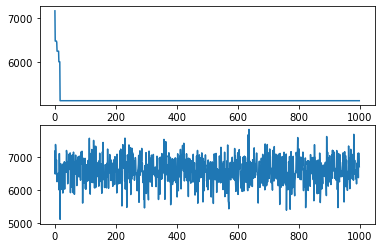

In [21]:
out=aco_optimization(cities,no_of_ants=17,alpha=4,beta=4,rho=0.4,Q=5)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()



 ants=5 ,$\alpha=4$ ,$\beta=4$ ,$\rho=0.1$,Q=2 

the best path is  ['Redding', 'San Francisco', 'Oakland', 'Los Angeles', 'San Diego', 'Carlsbad', 'Long Beach', 'San Cruz', 'San Luis Obispo', 'Modesto', 'Stockton', 'Merced', 'Sequoia Park', 'San Jose', 'Santa Rosa', 'Sacremento', 'Fresno', 'Yosemite', 'Bakersfield', 'San Bernardino', 'Eureka', 'Monterey', 'Barstow', 'Santa Barbara', 'Palm Springs', 'lake Tahoe,So', 'Las Vegas', 'Redding']
The distance is 5559


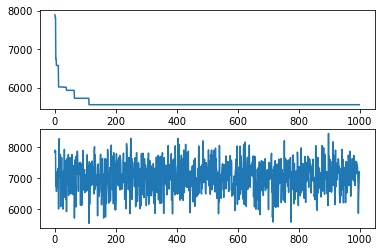

In [22]:
out=aco_optimization(cities,no_of_ants=5,alpha=4,beta=4,rho=0.1,Q=2)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()



 ants=24 ,$\alpha=4$ ,$\beta=2$ ,$\rho=0.4$,Q=8

the best path is  ['Oakland', 'San Francisco', 'Modesto', 'Stockton', 'San Bernardino', 'Santa Barbara', 'Long Beach', 'Carlsbad', 'Los Angeles', 'Merced', 'Eureka', 'Santa Rosa', 'San Luis Obispo', 'Monterey', 'Fresno', 'San Diego', 'Bakersfield', 'Sequoia Park', 'lake Tahoe,So', 'Yosemite', 'San Jose', 'Sacremento', 'San Cruz', 'Palm Springs', 'Barstow', 'Las Vegas', 'Redding', 'Oakland']
The distance is 5379


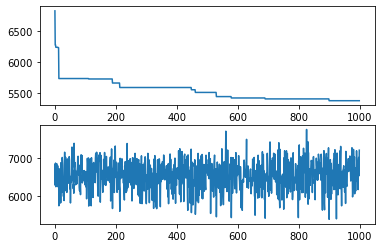

In [23]:
out=aco_optimization(cities,no_of_ants=24,alpha=4,beta=2,rho=0.4,Q=8)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()



 ants=23 ,$\alpha=3$ ,$\beta=3$ ,$\rho=0.3443$,Q=10

the best path is  ['Yosemite', 'Modesto', 'San Francisco', 'Oakland', 'Sacremento', 'Stockton', 'San Jose', 'Merced', 'Carlsbad', 'Palm Springs', 'Long Beach', 'San Bernardino', 'Las Vegas', 'Los Angeles', 'San Diego', 'Sequoia Park', 'Santa Rosa', 'Eureka', 'San Cruz', 'Monterey', 'Bakersfield', 'Fresno', 'San Luis Obispo', 'Santa Barbara', 'Barstow', 'Redding', 'lake Tahoe,So', 'Yosemite']
The distance is 4963


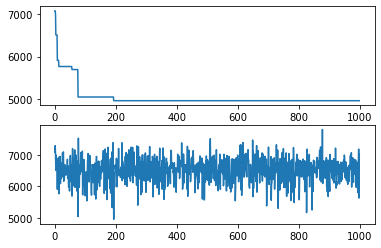

In [24]:
out=aco_optimization(cities,no_of_ants=23,alpha=3,beta=3,rho=0.3443,Q=10)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()



 ants=22,$\alpha=2$ ,$\beta=3$ ,$\rho=0.3443$,Q=4 

the best path is  ['San Francisco', 'Oakland', 'Merced', 'Modesto', 'Sacremento', 'Stockton', 'San Luis Obispo', 'Carlsbad', 'San Diego', 'San Bernardino', 'Palm Springs', 'Long Beach', 'Las Vegas', 'Los Angeles', 'San Cruz', 'Sequoia Park', 'Monterey', 'San Jose', 'Eureka', 'Santa Rosa', 'Fresno', 'Barstow', 'Yosemite', 'Santa Barbara', 'Bakersfield', 'lake Tahoe,So', 'Redding', 'San Francisco']
The distance is 5208


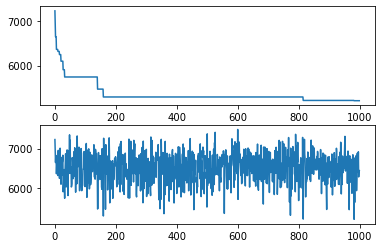

In [25]:
out=aco_optimization(cities,no_of_ants=22,alpha=2,beta=3,rho=0.3443,Q=4)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()



 ants=24 ,$\alpha=1$ ,$\beta=1$ ,$\rho=0.00234$,Q=4 

the best path is  ['Santa Rosa', 'San Jose', 'Oakland', 'Barstow', 'Palm Springs', 'Monterey', 'San Francisco', 'Santa Barbara', 'San Diego', 'Carlsbad', 'Los Angeles', 'Long Beach', 'Sequoia Park', 'San Cruz', 'Sacremento', 'Modesto', 'lake Tahoe,So', 'Merced', 'Yosemite', 'Fresno', 'Stockton', 'Redding', 'Eureka', 'San Bernardino', 'Las Vegas', 'Bakersfield', 'San Luis Obispo', 'Santa Rosa']
The distance is 4744


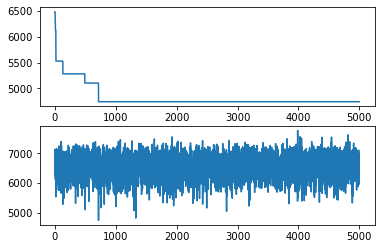

In [24]:
out=aco_optimization(cities,no_of_ants=24,alpha=1,beta=1,rho=0.00234,Q=5)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()



 ants=15 ,$\alpha=2$ ,$\beta=3$ ,$\rho=0.04$,Q=5

the best path is  ['Eureka', 'San Francisco', 'Oakland', 'Merced', 'Stockton', 'Fresno', 'San Luis Obispo', 'Sacremento', 'San Jose', 'Carlsbad', 'San Diego', 'Long Beach', 'Los Angeles', 'San Bernardino', 'Yosemite', 'Monterey', 'San Cruz', 'Santa Rosa', 'lake Tahoe,So', 'Bakersfield', 'Modesto', 'Sequoia Park', 'Palm Springs', 'Santa Barbara', 'Barstow', 'Las Vegas', 'Redding', 'Eureka']
The distance is 5095


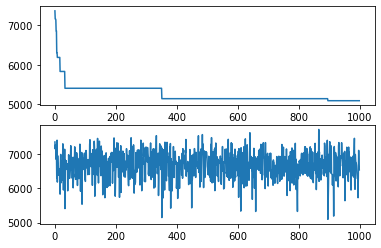

In [27]:
out=aco_optimization(cities,no_of_ants=15,alpha=2,beta=3,rho=0.4,Q=5)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()




 ants=24 ,$\alpha=4$ ,$\beta=3$ ,$\rho=0.002$,Q=5

the best path is  ['Sacremento', 'Stockton', 'Oakland', 'San Francisco', 'San Cruz', 'Santa Rosa', 'Merced', 'Carlsbad', 'San Diego', 'Los Angeles', 'Long Beach', 'Palm Springs', 'Modesto', 'lake Tahoe,So', 'Eureka', 'San Jose', 'San Luis Obispo', 'Bakersfield', 'San Bernardino', 'Barstow', 'Las Vegas', 'Fresno', 'Sequoia Park', 'Yosemite', 'Monterey', 'Santa Barbara', 'Redding', 'Sacremento']
The distance is 4857


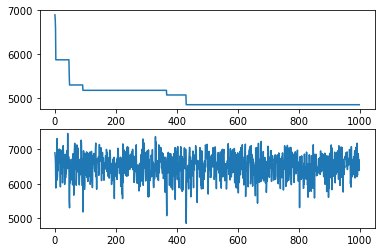

In [28]:
out=aco_optimization(cities,no_of_ants=24,alpha=4,beta=3,rho=0.2,Q=5)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()

 ants=3 ,$\alpha=4$ ,$\beta=4$ ,$\rho=0.01$,Q=2

the best path is  ['San Jose', 'Oakland', 'San Francisco', 'San Cruz', 'San Luis Obispo', 'Carlsbad', 'San Diego', 'San Bernardino', 'Eureka', 'Santa Rosa', 'Stockton', 'Modesto', 'Long Beach', 'Los Angeles', 'Sacremento', 'lake Tahoe,So', 'Merced', 'Sequoia Park', 'Monterey', 'Palm Springs', 'Barstow', 'Yosemite', 'Fresno', 'Bakersfield', 'Santa Barbara', 'Las Vegas', 'Redding', 'San Jose']
The distance is 4929


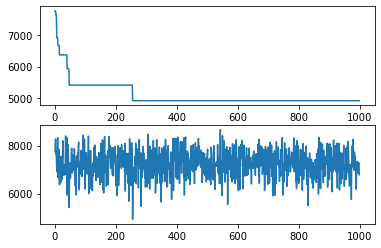

In [29]:
out=aco_optimization(cities,no_of_ants=3,alpha=4,beta=4,rho=0.1,Q=2)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()

 ants=26 $\alpha=2$ ,$\beta=1$ ,$\rho=0.000234$,Q=5

the best path is  ['Redding', 'Sequoia Park', 'Eureka', 'Bakersfield', 'San Luis Obispo', 'Fresno', 'Merced', 'Stockton', 'Modesto', 'Monterey', 'San Francisco', 'San Jose', 'Santa Barbara', 'San Cruz', 'Oakland', 'Sacremento', 'lake Tahoe,So', 'Las Vegas', 'Palm Springs', 'San Bernardino', 'Long Beach', 'Carlsbad', 'San Diego', 'Barstow', 'Los Angeles', 'Yosemite', 'Santa Rosa', 'Redding']
The distance is 5161


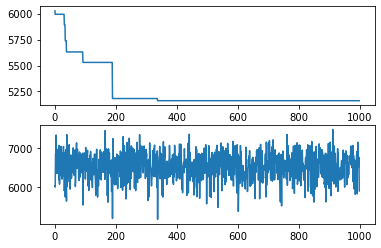

In [30]:
out=aco_optimization(cities,no_of_ants=26,alpha=2,beta=1,rho=0.000234,Q=5)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()

 ants=24 $\alpha=3$ ,$\beta=3$ ,$\rho=0.3443$,Q=4 

the best path is  ['Redding', 'Oakland', 'San Francisco', 'San Cruz', 'Yosemite', 'Modesto', 'San Jose', 'Stockton', 'Merced', 'San Luis Obispo', 'Las Vegas', 'Long Beach', 'San Bernardino', 'San Diego', 'Carlsbad', 'Barstow', 'Los Angeles', 'Sequoia Park', 'Palm Springs', 'Bakersfield', 'Fresno', 'Eureka', 'Sacremento', 'Santa Rosa', 'lake Tahoe,So', 'Monterey', 'Santa Barbara', 'Redding']
The distance is 5181


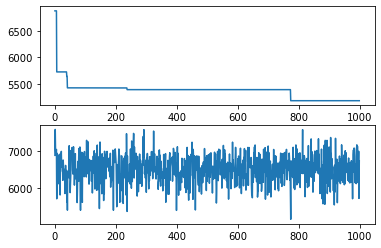

In [31]:
out=aco_optimization(cities,no_of_ants=24,alpha=3,beta=3,rho=0.3443,Q=4)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()

 ants=24 $\alpha=10$ ,$\beta=3$ ,$\rho=0.3443$,Q=4 

the best path is  ['San Francisco', 'Oakland', 'San Cruz', 'San Luis Obispo', 'Los Angeles', 'Carlsbad', 'Long Beach', 'Palm Springs', 'San Bernardino', 'San Diego', 'Monterey', 'Stockton', 'Modesto', 'San Jose', 'Merced', 'Sacremento', 'Eureka', 'Santa Rosa', 'Fresno', 'Barstow', 'Las Vegas', 'lake Tahoe,So', 'Bakersfield', 'Yosemite', 'Santa Barbara', 'Sequoia Park', 'Redding', 'San Francisco']
The distance is 5130


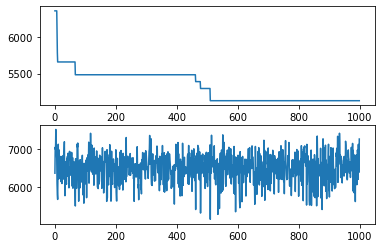

In [32]:
out=aco_optimization(cities,no_of_ants=24,alpha=10,beta=3,rho=0.3443,Q=4)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()

 ants=24 $\alpha=7$ ,$\beta=3$ ,$\rho=0.3443$,Q=4 

the best path is  ['Stockton', 'San Francisco', 'Oakland', 'Carlsbad', 'Barstow', 'San Diego', 'Los Angeles', 'Long Beach', 'San Luis Obispo', 'Monterey', 'Santa Barbara', 'Modesto', 'Merced', 'Yosemite', 'San Jose', 'Santa Rosa', 'Fresno', 'San Cruz', 'Las Vegas', 'Sacremento', 'Eureka', 'San Bernardino', 'Palm Springs', 'Bakersfield', 'Sequoia Park', 'lake Tahoe,So', 'Redding', 'Stockton']
The distance is 5166


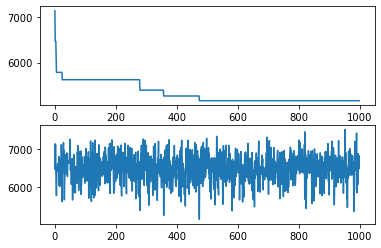

In [33]:
out=aco_optimization(cities,no_of_ants=24,alpha=7,beta=3,rho=0.3443,Q=4)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()

 ants=22 $\alpha=1$ ,$\beta=1$ ,$\rho=0.0000234$,Q=4 

the best path is  ['lake Tahoe,So', 'Oakland', 'San Bernardino', 'San Diego', 'Bakersfield', 'San Luis Obispo', 'Barstow', 'Las Vegas', 'Carlsbad', 'Los Angeles', 'Long Beach', 'Santa Barbara', 'Sequoia Park', 'Monterey', 'Santa Rosa', 'Eureka', 'San Francisco', 'Merced', 'Fresno', 'Palm Springs', 'San Jose', 'Sacremento', 'Modesto', 'Stockton', 'San Cruz', 'Yosemite', 'Redding', 'lake Tahoe,So']
The distance is 5272


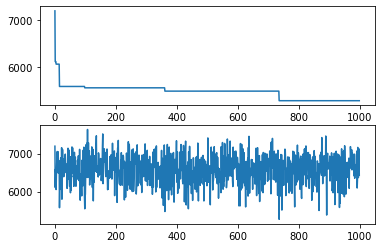

In [34]:
out=aco_optimization(cities,no_of_ants=22,alpha=1,beta=1,rho=0.0000234,Q=5)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()

 ants=24 $\alpha=1$ ,$\beta=1$ ,$\rho=0.009$,Q=5

the best path is  ['Fresno', 'Monterey', 'San Jose', 'Sequoia Park', 'Eureka', 'Redding', 'lake Tahoe,So', 'Santa Barbara', 'Stockton', 'San Francisco', 'Modesto', 'Merced', 'San Cruz', 'Palm Springs', 'Las Vegas', 'Long Beach', 'Los Angeles', 'Bakersfield', 'Yosemite', 'Santa Rosa', 'Oakland', 'Sacremento', 'Barstow', 'Carlsbad', 'San Diego', 'San Bernardino', 'San Luis Obispo', 'Fresno']
The distance is 5078


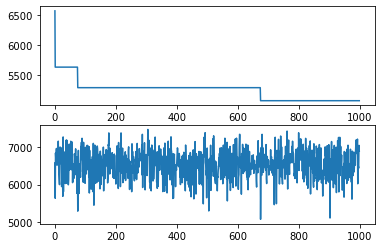

In [35]:
out=aco_optimization(cities,no_of_ants=24,alpha=1,beta=1,rho=0.009,Q=5)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()

 ants=26 $\alpha=2$ ,$\beta=1$ ,$\rho=0.002$,Q=4 

the best path is  ['San Jose', 'Eureka', 'Redding', 'San Francisco', 'Sacremento', 'Oakland', 'Los Angeles', 'Monterey', 'Stockton', 'San Cruz', 'Palm Springs', 'San Luis Obispo', 'lake Tahoe,So', 'Modesto', 'Merced', 'Fresno', 'Yosemite', 'Santa Barbara', 'San Diego', 'Carlsbad', 'Long Beach', 'Sequoia Park', 'Las Vegas', 'San Bernardino', 'Barstow', 'Bakersfield', 'Santa Rosa', 'San Jose']
The distance is 4958


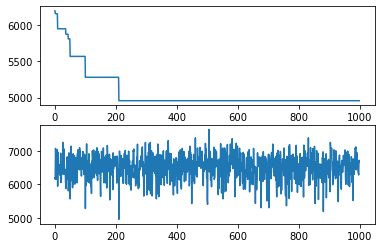

In [36]:
out=aco_optimization(cities,no_of_ants=26,alpha=2,beta=1,rho=0.002,Q=4)
print(f"The distance is {min(out[0])}")
fig,ax=plt.subplots(2)
ax[0].plot(out[0])
ax[1].plot(out[1])
plt.show()